In [1]:
import torch
from torch import nn
import torch.nn.functional as F

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelBinarizer

import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torch.utils.data import Dataset, DataLoader

In [2]:
df = pd.read_csv('mydata.csv')
column_names = ['Temp_stage_1', 'Temp_stage_2', 'Temp_stage_3', 'Temp_stage_4', 'Temp_stage_5',
              'Temp_stage_6', 'Temp_stage_7', 'Temp_stage_8','Temp_stage_9','Temp_stage_10', 
              'Temp_stage_11','Reflux_1','Reflux_2','Reflux_3','Column Inlet','Inlet Flow','Product Flow ',
              'hx_1_inlet','hx_2_inlet','hx_3_inlet','hx_4_inlet', 'hx_1_outlet','hx_2_outlet','hx_3_outlet',
              'hx_4_outlet','level_1','level_2','level_3','level_4','level_5','level_6','level_7',
              'level_8','level_9','level_10','level_11','level_12','h_gas_det_1','h_gas_det_2','h_gas_det_3',
              'h_gas_det_4','h_gas_det_5','h_gas_det_6',' Impurities']

In [3]:
df_target = df.iloc[:, :-1]

In [4]:
scaler = MinMaxScaler(feature_range=(-1, 1))
# fit the scaler to data
scaler.fit(df_target)

# transform the data to MinMax scale
target_tensor = scaler.transform(df_target)

target_tensor = pd.DataFrame(target_tensor, columns=column_names)
target_tensor

,Temp_stage_1,Temp_stage_2,Temp_stage_3,Temp_stage_4,Temp_stage_5,Temp_stage_6,Temp_stage_7,Temp_stage_8,Temp_stage_9,Temp_stage_10,...,level_10,level_11,level_12,h_gas_det_1,h_gas_det_2,h_gas_det_3,h_gas_det_4,h_gas_det_5,h_gas_det_6,Impurities
0,0.000000,4.441323e-08,2.763489e-08,4.441322e-08,2.763489e-08,4.441322e-08,0.000000,5.428283e-08,0.000000,5.428283e-08,...,2.763489e-08,-1.263309e-07,2.763489e-08,-0.903692,-0.127964,0.765415,0.955074,-0.013277,0.266643,-0.581239
1,0.006283,6.220358e-03,6.157511e-03,6.220358e-03,6.157511e-03,6.220358e-03,0.006283,6.346029e-03,0.006283,6.346029e-03,...,6.157511e-03,5.906034e-03,6.157511e-03,-0.892873,-0.103500,0.781032,0.947485,-0.037898,0.242826,-0.576115
2,0.012566,1.244043e-02,1.231476e-02,1.244043e-02,1.231476e-02,1.244043e-02,0.012566,1.269175e-02,0.012566,1.269175e-02,...,1.231476e-02,1.181199e-02,1.231476e-02,-0.881513,-0.078975,0.796174,0.939322,-0.062495,0.218863,-0.570968
3,0.018848,1.866002e-02,1.847154e-02,1.866002e-02,1.847154e-02,1.866002e-02,0.018848,1.903696e-02,0.018848,1.903696e-02,...,1.847154e-02,1.771753e-02,1.847154e-02,-0.869619,-0.054403,0.810832,0.930590,-0.087053,0.194769,-0.565798
4,0.025130,2.487889e-02,2.462763e-02,2.487889e-02,2.462763e-02,2.487889e-02,0.025130,2.538140e-02,0.025130,2.538140e-02,...,2.462763e-02,2.362246e-02,2.462763e-02,-0.857199,-0.029801,0.824997,0.921295,-0.111555,0.170560,-0.560606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.031411,-3.384423e-01,-6.124105e-01,-3.384423e-01,-6.124105e-01,-3.384423e-01,-0.031411,2.786895e-01,-0.031411,2.786895e-01,...,-6.124105e-01,-9.415179e-01,-6.124105e-01,0.422648,-0.534263,-0.999974,-0.546314,0.648208,0.409625,-0.606512
9996,-0.025130,-3.325825e-01,-6.075312e-01,-3.325825e-01,-6.075312e-01,-3.325825e-01,-0.025130,2.847784e-01,-0.025130,2.847784e-01,...,-6.075312e-01,-9.434916e-01,-6.075312e-01,0.404880,-0.550659,-0.999924,-0.529864,0.662945,0.427350,-0.601505
9997,-0.018848,-3.267099e-01,-6.026288e-01,-3.267099e-01,-6.026288e-01,-3.267099e-01,-0.018848,2.908559e-01,-0.018848,2.908559e-01,...,-6.026288e-01,-9.454324e-01,-6.026288e-01,0.386873,-0.566921,-0.999489,-0.513133,0.677498,0.444996,-0.596473
9998,-0.012566,-3.208246e-01,-5.977035e-01,-3.208246e-01,-5.977035e-01,-3.208246e-01,-0.012566,2.969217e-01,-0.012566,2.969217e-01,...,-5.977035e-01,-9.473403e-01,-5.977035e-01,0.368632,-0.583039,-0.998666,-0.496125,0.691856,0.462551,-0.591419


In [5]:
conditions_tensor = torch.tensor(df['Pressure Condition'].values.reshape(-1,1), dtype=torch.float32)
print(f"shape of conditions_tensor: {conditions_tensor.shape}")

target_tensor = torch.tensor(target_tensor.values, dtype=torch.float32)
print(f"shape of target_tensor: {target_tensor.shape}")

shape of conditions_tensor: torch.Size([10000, 1])
shape of target_tensor: torch.Size([10000, 44])


In [6]:
target_tensor

tensor([[ 0.0000e+00,  4.4413e-08,  2.7635e-08,  ..., -1.3277e-02,
          2.6664e-01, -5.8124e-01],
        [ 6.2831e-03,  6.2204e-03,  6.1575e-03,  ..., -3.7898e-02,
          2.4283e-01, -5.7611e-01],
        [ 1.2566e-02,  1.2440e-02,  1.2315e-02,  ..., -6.2495e-02,
          2.1886e-01, -5.7097e-01],
        ...,
        [-1.8848e-02, -3.2671e-01, -6.0263e-01,  ...,  6.7750e-01,
          4.4500e-01, -5.9647e-01],
        [-1.2566e-02, -3.2082e-01, -5.9770e-01,  ...,  6.9186e-01,
          4.6255e-01, -5.9142e-01],
        [-6.2831e-03, -3.1493e-01, -5.9276e-01,  ...,  7.0601e-01,
          4.8001e-01, -5.8634e-01]])

In [7]:
N_SAMPLES = 100
N_DATAPOINTS = 100

target_tensor_list = []
conditions_tensor_list = []

for i in np.arange(0, N_SAMPLES, 1):
    a = torch.split(target_tensor, N_DATAPOINTS, dim=0)[i]
    target_tensor_list.append(a)
    b = torch.split(conditions_tensor, N_DATAPOINTS, dim=0)[i]
    conditions_tensor_list.append(b)

In [8]:
class Dataloader(Dataset):
    def __init__(self, target, conditions):
        self.target = target
        self.conditions = conditions
    def __len__(self):
        return len(self.conditions)
    def __getitem__(self, idx):
        condition = self.conditions[idx]
        target = self.target[idx]
                
        return target, condition

In [9]:
train_data = Dataloader(target=target_tensor_list,
                               conditions=conditions_tensor_list)

In [10]:
BATCH_SIZE = 20

train_dataloader = DataLoader(
    dataset=train_data,
    batch_size=BATCH_SIZE,
    shuffle=False,
)

In [11]:
class ConditionalGenerator(nn.Module):
    # Generates synthetic data conditioned on a given vector
    
    def __init__(self):
        super().__init__()
        self.noise_layer = nn.Linear(44, 32)
        self.condition_layer = nn.Linear(1, 32)
        self.model = nn.Sequential(
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 44),
        )

    def forward(self, noise, condition):
        batch_size = noise.size(0)
        noise_embedding = F.relu(self.noise_layer(noise.view(batch_size, -1)))
        condition_embedding = F.relu(self.condition_layer(condition.view(batch_size, -1)))
        combined = torch.cat([noise_embedding, condition_embedding], dim=1)
        output = self.model(combined)
        return output

In [12]:
class ConditionalDiscriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv1d(in_channels=45, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv1d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.fc = nn.Linear(in_features=128*100, out_features=1)

    def forward(self, x, condition):
        # Concatenate along the channel dimension
        x = torch.cat([x, condition], dim=1)

        # Apply convolutional layers
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))

        # Flatten the tensor
        x = x.view(x.shape[0], -1)

        # Apply the final fully-connected layer with sigmoid activation
        x = torch.sigmoid(self.fc(x))
        
        return x

In [13]:
num_epochs = 100
batch_size = 64
learning_rate = 0.001

generator = ConditionalGenerator()
discriminator = ConditionalDiscriminator()
optimizer = optim.Adam(generator.parameters(), lr=learning_rate)
criterion = nn.MSELoss()
discriminator_loss = nn.BCELoss()

In [14]:
def generate_batch(generator, batch_size, time_series_length, features):
    generated_data = []
    for _ in range(batch_size):
        noise = torch.randn(time_series_length, features)
        condition = torch.zeros(time_series_length, 1)
        generated_instance = generator(noise, condition)
        generated_data.append(generated_instance)
    generated_data = torch.stack(generated_data, dim=0)
    return generated_data

In [15]:
sample_size = 20
time_series_length = 100
features = 44

generator_loss_fn = nn.MSELoss()
discriminator_loss_fn = nn.BCELoss()
discriminator_optimizer = optim.Adam(discriminator.parameters(), lr=learning_rate)
generator_optimizer = optim.Adam(generator.parameters(), lr=learning_rate)



# Training loop
for epoch in range(num_epochs):
    for batch_idx, (targets, conditions) in enumerate(train_dataloader):
    
#         print(targets.shape,conditions.shape)
        targets = targets.transpose(1,2)
        conditions = conditions.transpose(1,2)
#         print(targets.shape,conditions.shape)

        # Train the discriminator
        discriminator.zero_grad()
        
        real_outputs = discriminator(targets, conditions)
        real_labels = torch.ones_like(real_outputs)
        real_loss = discriminator_loss_fn(real_outputs, real_labels)

        fake_data = generate_batch(generator, sample_size, time_series_length, features)
        fake_condition = torch.zeros(20,1,time_series_length)
        fake_data = fake_data.transpose(1,2)
        fake_outputs = discriminator(fake_data, fake_condition)
        fake_labels = torch.zeros_like(fake_outputs)
        fake_loss = discriminator_loss_fn(fake_outputs, fake_labels)
        
        discriminator_loss = real_loss + fake_loss
        discriminator_loss.backward(retain_graph=True)
        discriminator_optimizer.step()
        
        # Train the generator
        generator.zero_grad()
        fake_outputs = discriminator(fake_data, fake_condition)
    
        desired_labels = torch.ones_like(fake_outputs)
        generator_loss = generator_loss_fn(fake_outputs, desired_labels)
        
        generator_loss.backward(retain_graph=True)
        generator_optimizer.step()
        
        #Print loss statistics or other metrics
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], "f"Discriminator Loss: {discriminator_loss:.4f}, "f"Generator Loss: {generator_loss:.4f}")

Epoch [10/100], Discriminator Loss: 0.0000, Generator Loss: 0.9999
Epoch [20/100], Discriminator Loss: 0.0002, Generator Loss: 0.9997
Epoch [30/100], Discriminator Loss: 0.0001, Generator Loss: 0.9999
Epoch [40/100], Discriminator Loss: 0.0000, Generator Loss: 1.0000
Epoch [50/100], Discriminator Loss: 0.0000, Generator Loss: 1.0000
Epoch [60/100], Discriminator Loss: 0.0000, Generator Loss: 1.0000
Epoch [70/100], Discriminator Loss: 0.0000, Generator Loss: 1.0000
Epoch [80/100], Discriminator Loss: 0.0000, Generator Loss: 1.0000
Epoch [90/100], Discriminator Loss: 0.0000, Generator Loss: 1.0000
Epoch [100/100], Discriminator Loss: 0.0000, Generator Loss: 1.0000


In [16]:
# real_outputs.shape, real_labels.shape, fake_data.shape, fake_outputs.shape

In [17]:
fake_loss, real_loss

(tensor(8.1189e-07, grad_fn=<BinaryCrossEntropyBackward0>),
 tensor(5.9009e-07, grad_fn=<BinaryCrossEntropyBackward0>))

In [18]:
noise = torch.randn(100, 44)
condition = torch.zeros(100, 1)
generated_instance = generator(noise, condition)

In [19]:
generated_instance




tensor([[-0.1955, -0.5226, -0.1601,  ...,  0.4137, -0.2975,  0.4486],
        [-0.1765, -0.5342, -0.0887,  ...,  0.4147, -0.2682,  0.4898],
        [-0.2228, -0.5025, -0.1138,  ...,  0.4042, -0.2404,  0.3581],
        ...,
        [-0.2969, -0.5246, -0.1979,  ...,  0.4563, -0.2882,  0.3784],
        [-0.2399, -0.5671, -0.2195,  ...,  0.4155, -0.3286,  0.5149],
        [-0.1583, -0.3824, -0.0278,  ...,  0.3017, -0.1482,  0.2565]],
       grad_fn=<AddmmBackward0>)

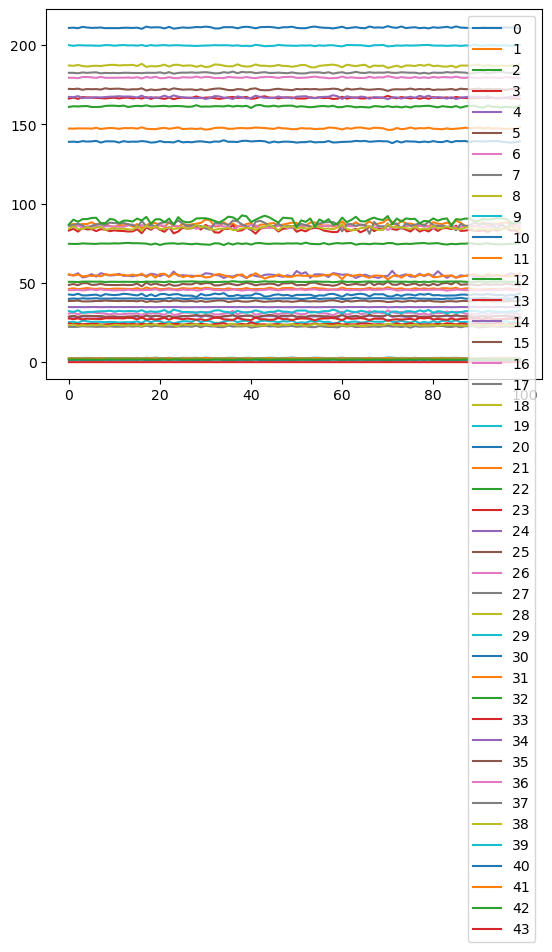

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a tensor named 'tensor'
# Step 1: Convert the tensor to a NumPy array
numpy_array = generated_instance.detach().numpy()
original_data = scaler.inverse_transform(numpy_array)
# Step 2: Create a pandas DataFrame from the NumPy array
df = pd.DataFrame(original_data)

# Step 3: Plot the DataFrame
df.plot()
plt.show()
